Данные по российскому рынку загружены из 'russia_cars.csv'.
Данные по китайским аукционам загружены из 'china.csv'.
Объединенный DataFrame создан.

Подготовка данных завершена. Начинаем построение графиков.

--- ГРАФИКИ ДЛЯ РОССИЙСКОГО РЫНКА ---


C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Марка', y='count', data=df_top_brands, ax=ax1, palette=sns.color_palette(pastel_palette, 10))


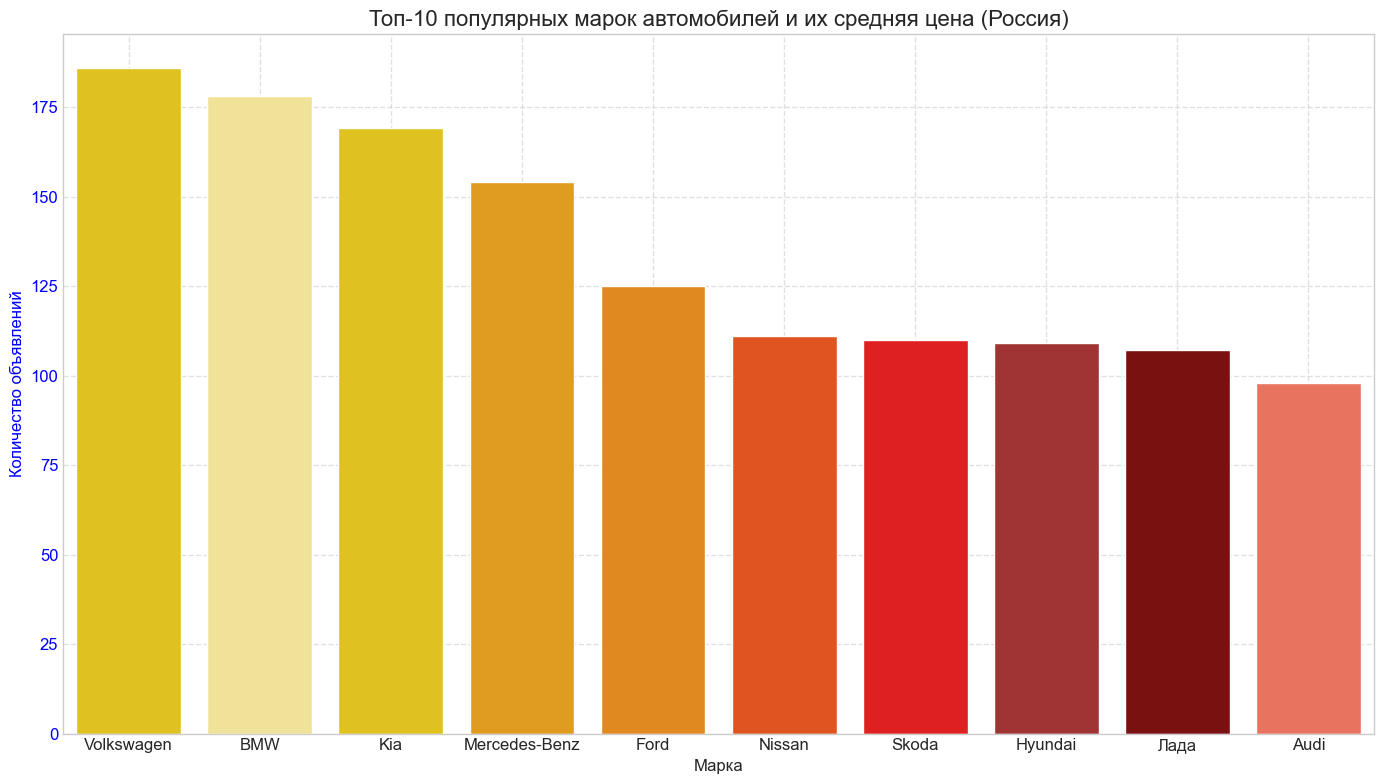

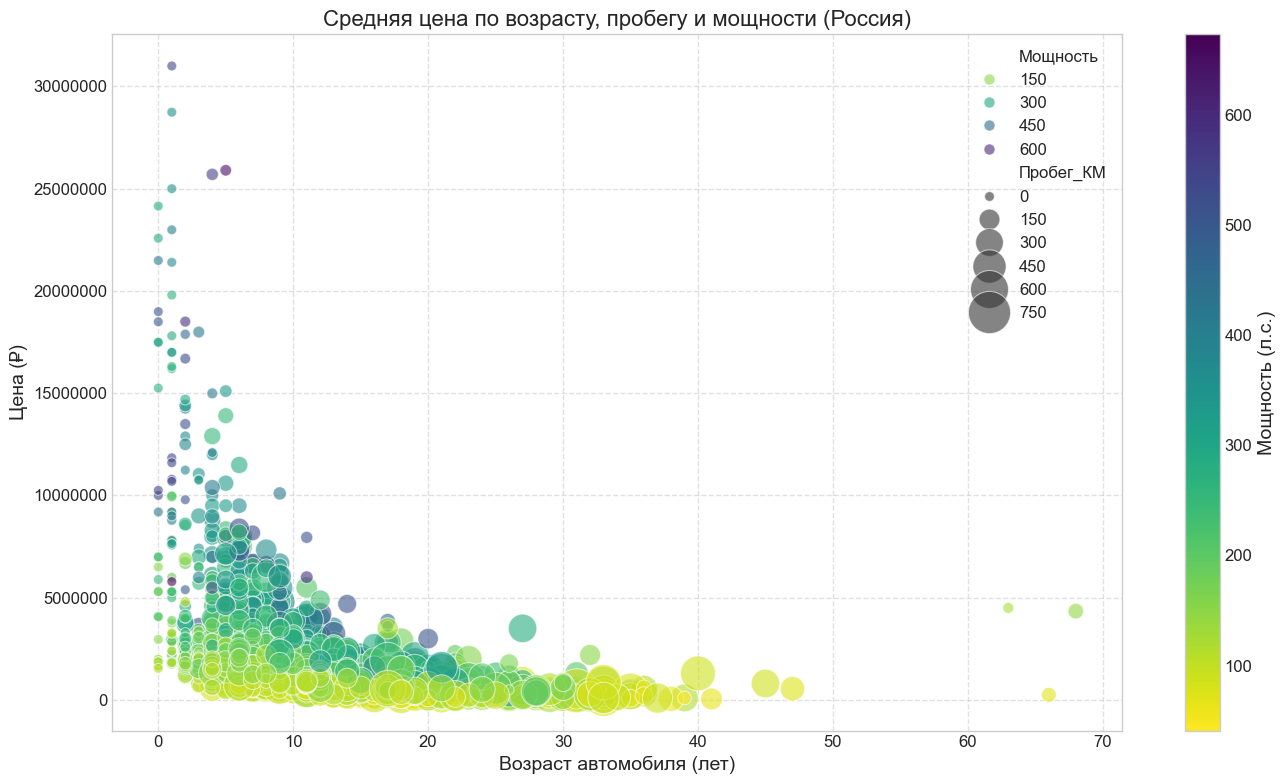

Недостаточно данных для построения тепловой карты (слишком много 'не указано' или пустой результат).


C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:286: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_owners = df_rus.groupby('Владельцы_Категория')['Цена'].mean().reset_index()
C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Владельцы_Категория', y='Цена', data=avg_price_by_owners, palette=sns.color_palette(pastel_palette, len(avg_price_by_owners)))


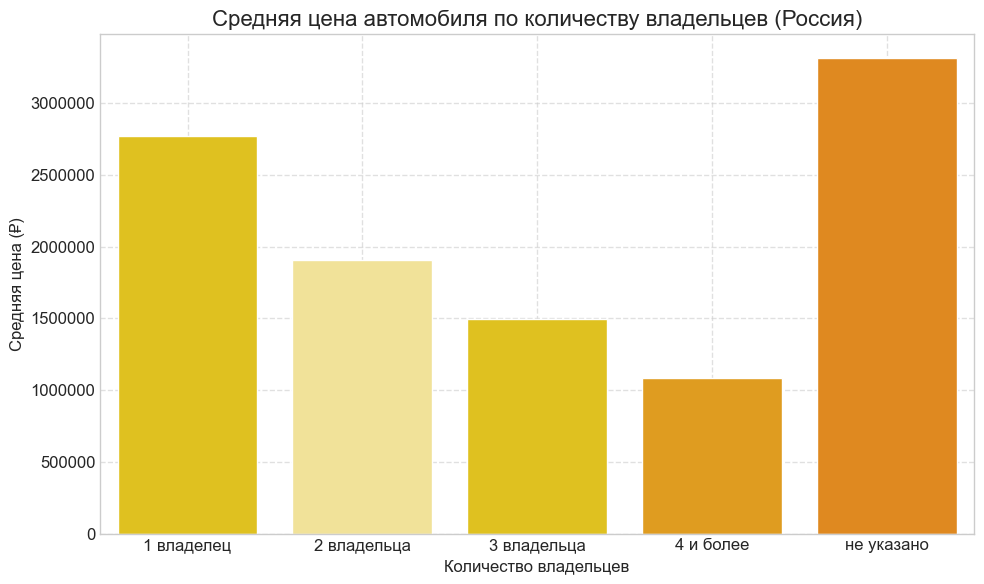

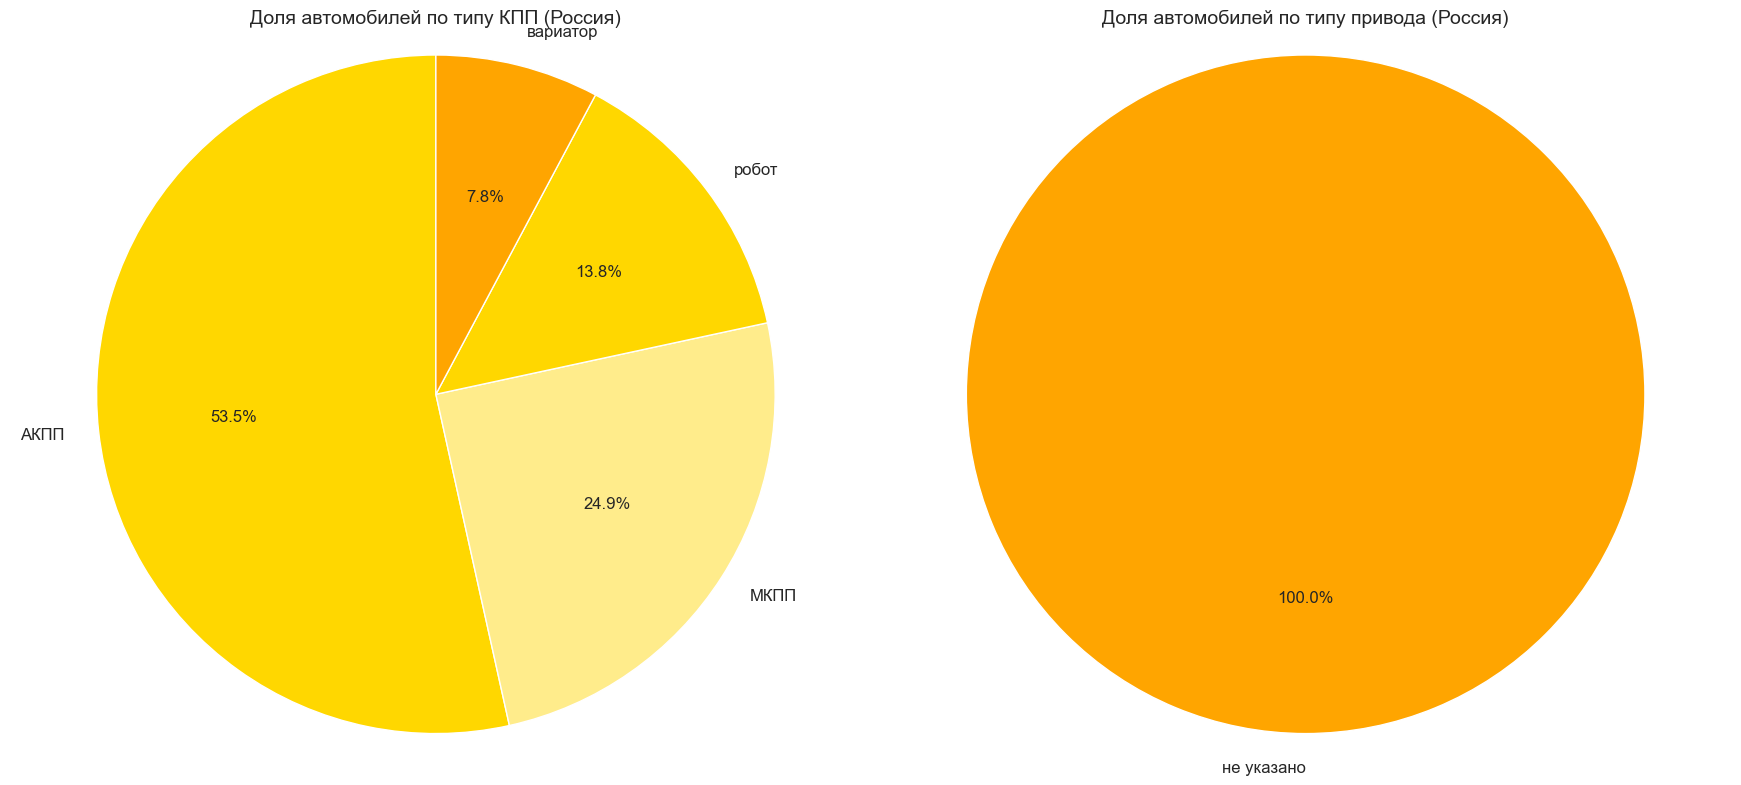

Недостаточно данных для построения графика распределения цен по типу топлива.

--- ГРАФИКИ ДЛЯ КИТАЙСКОГО РЫНКА ---


C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Марка', y='count', data=df_top_brands_chi, ax=ax1, palette=sns.color_palette(pastel_palette, 10))


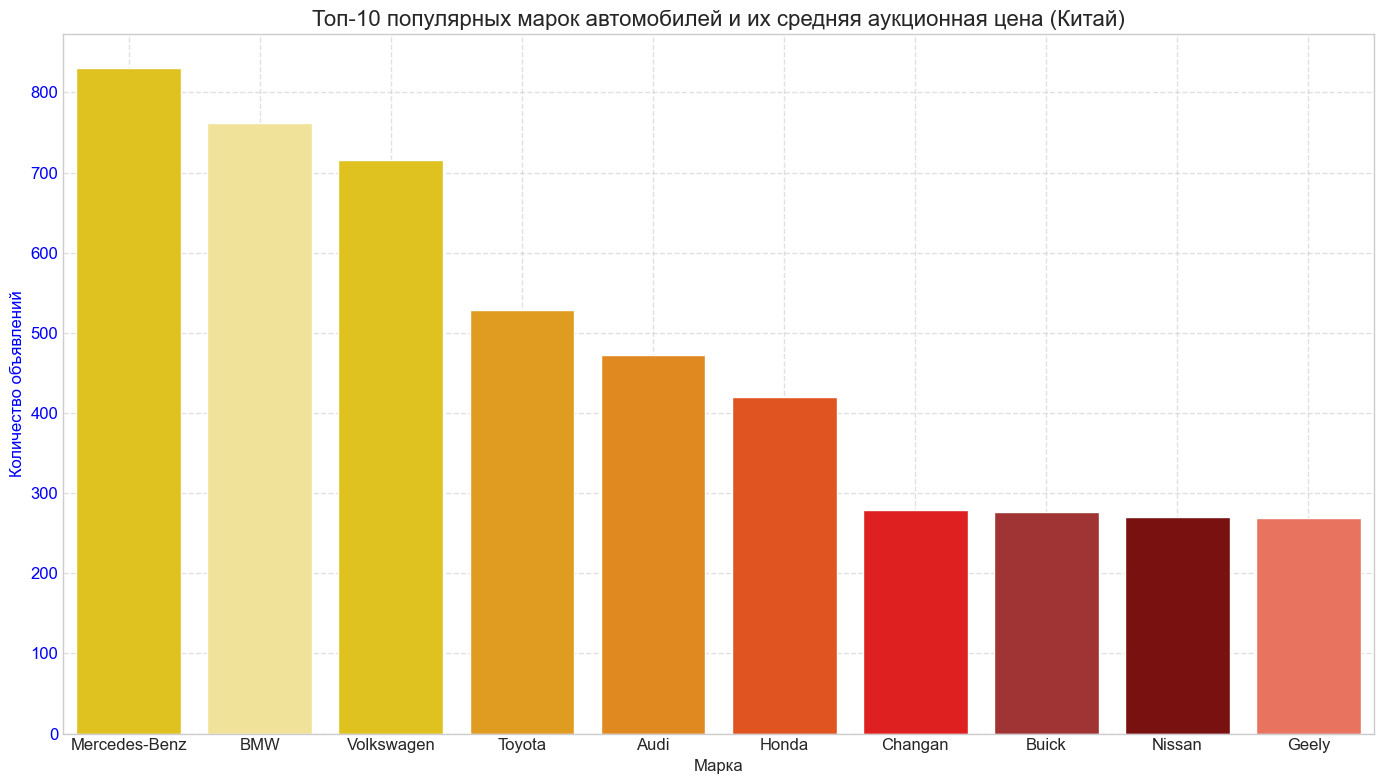

C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:380: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_chi = sns.scatterplot( # Получаем объект Axes


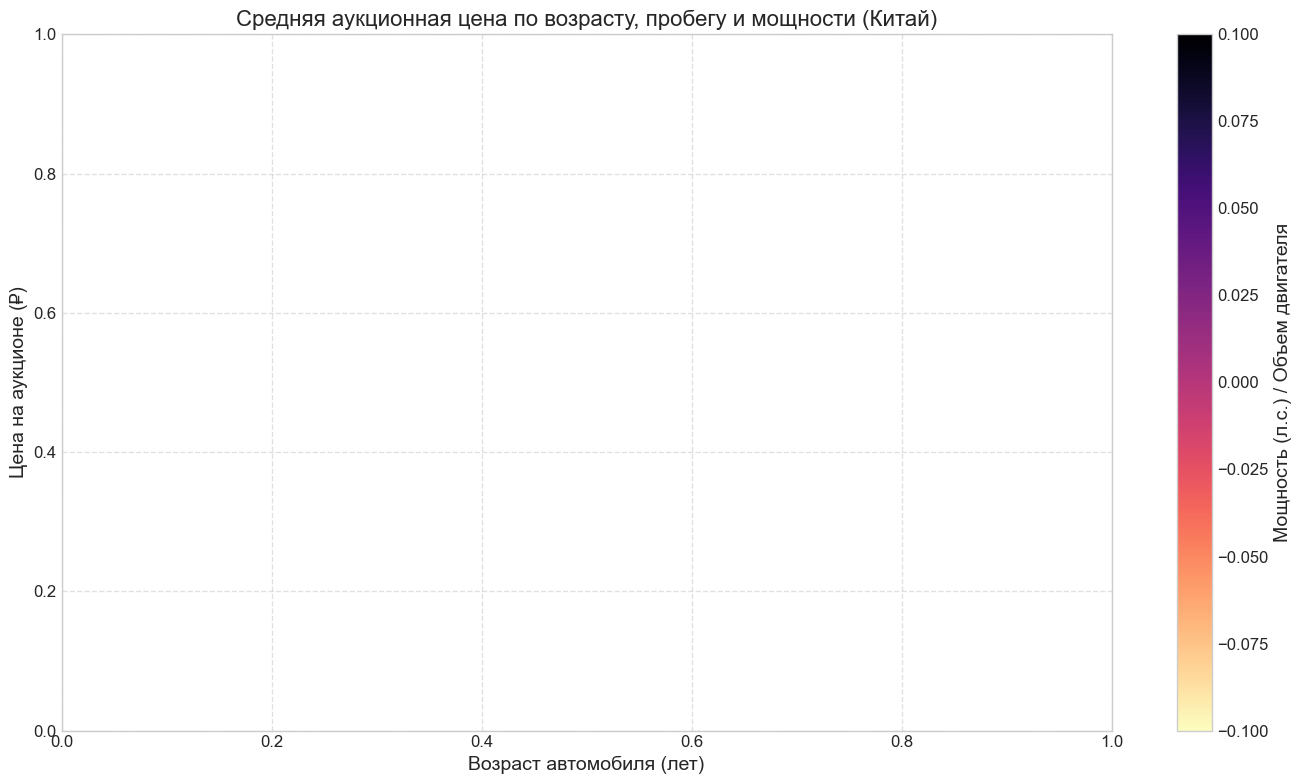

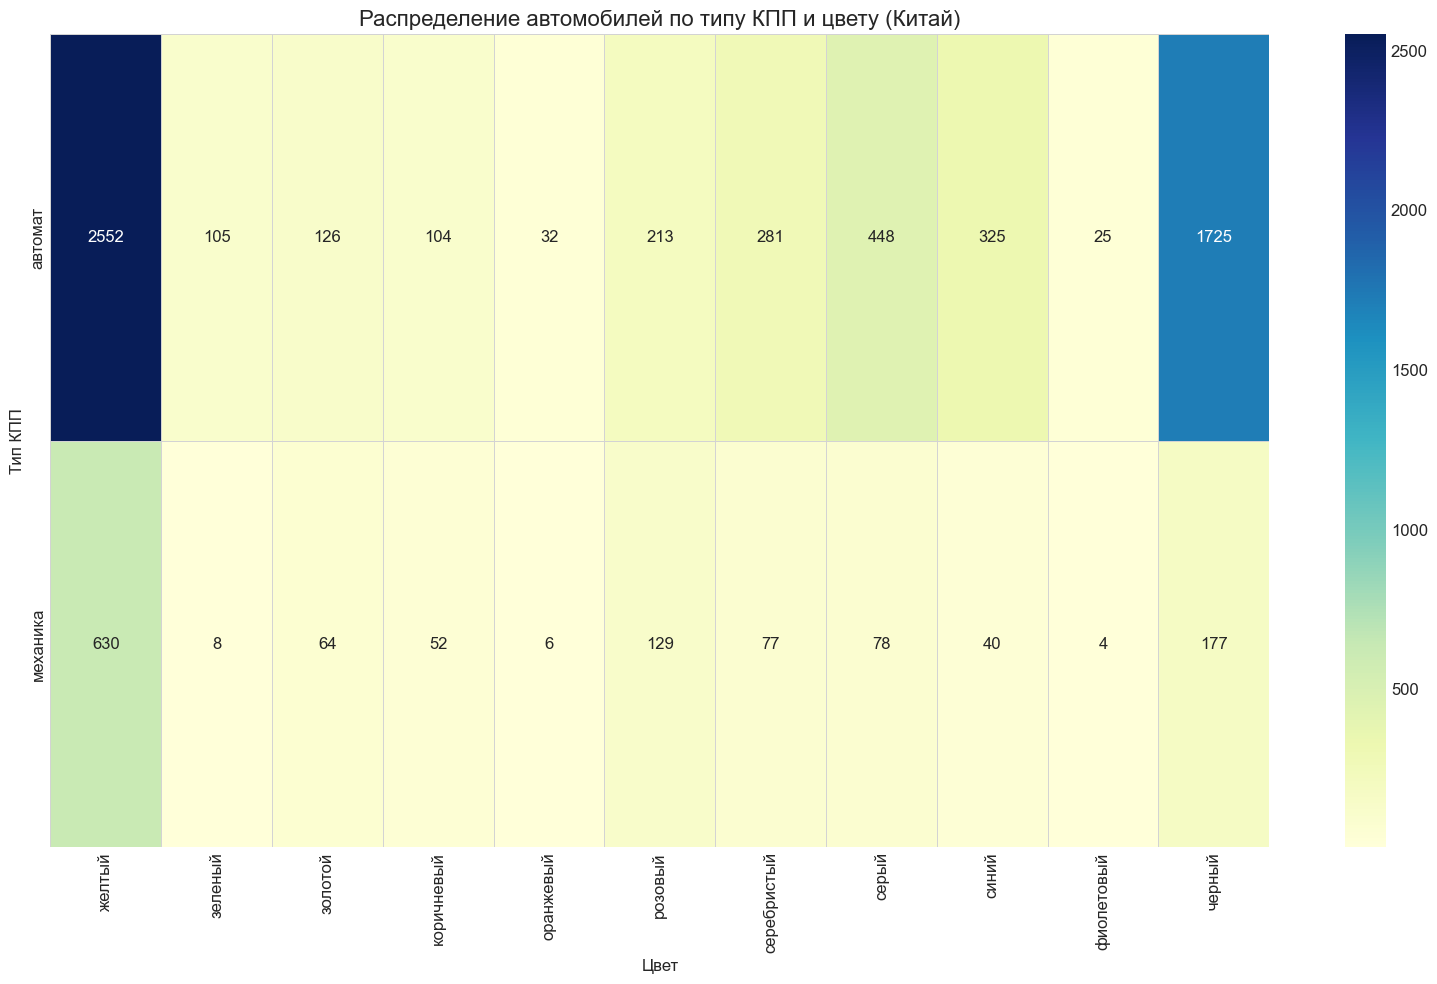


--- ГРАФИКИ СРАВНЕНИЯ РОССИИ И КИТАЯ ---


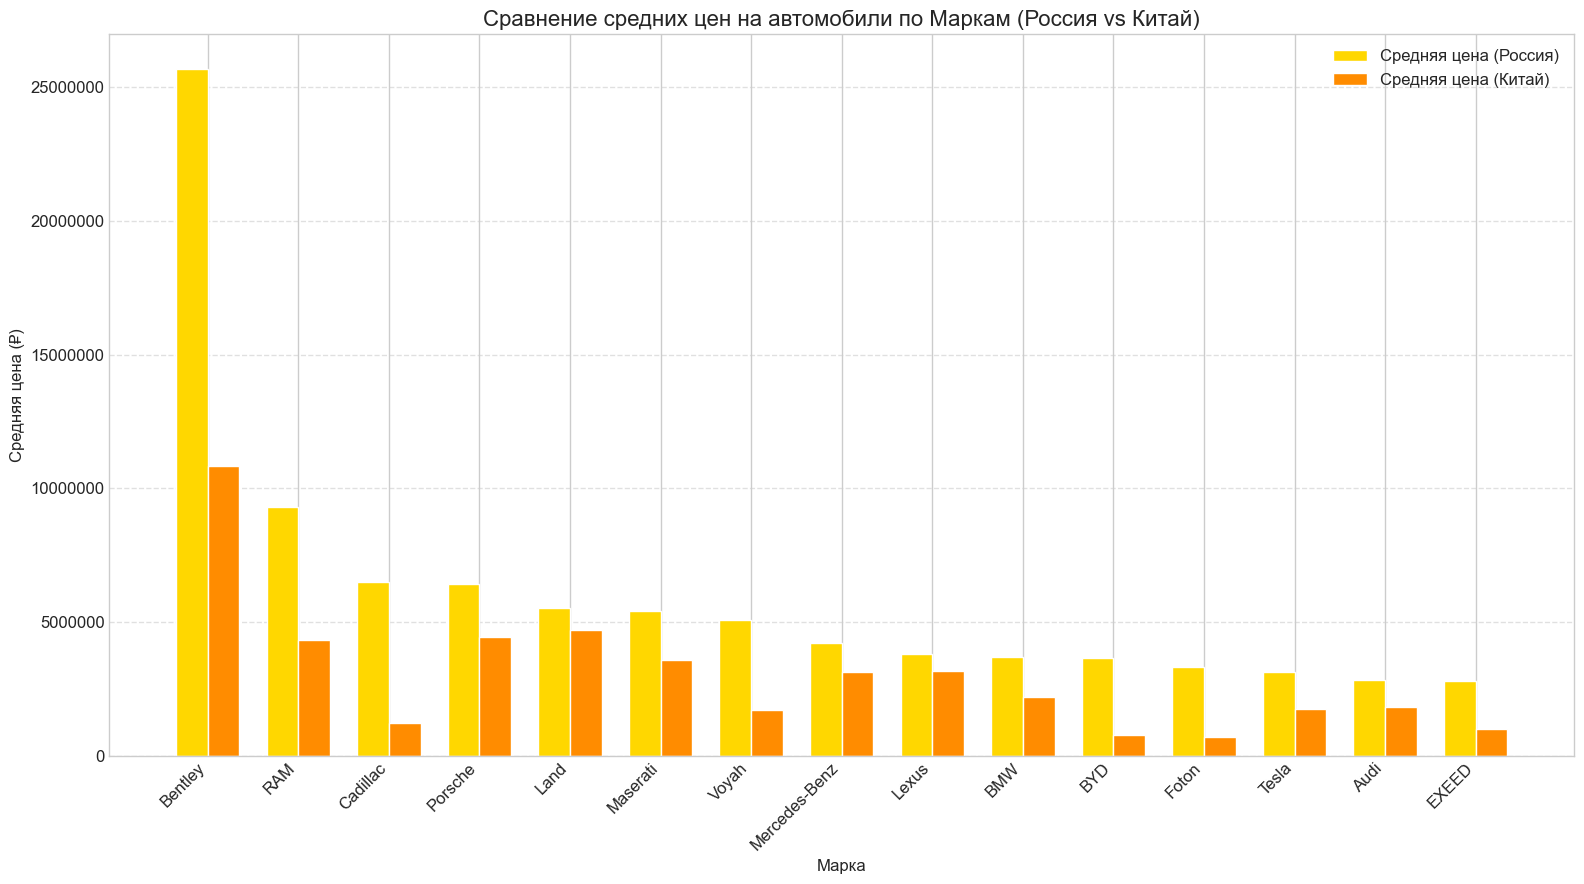

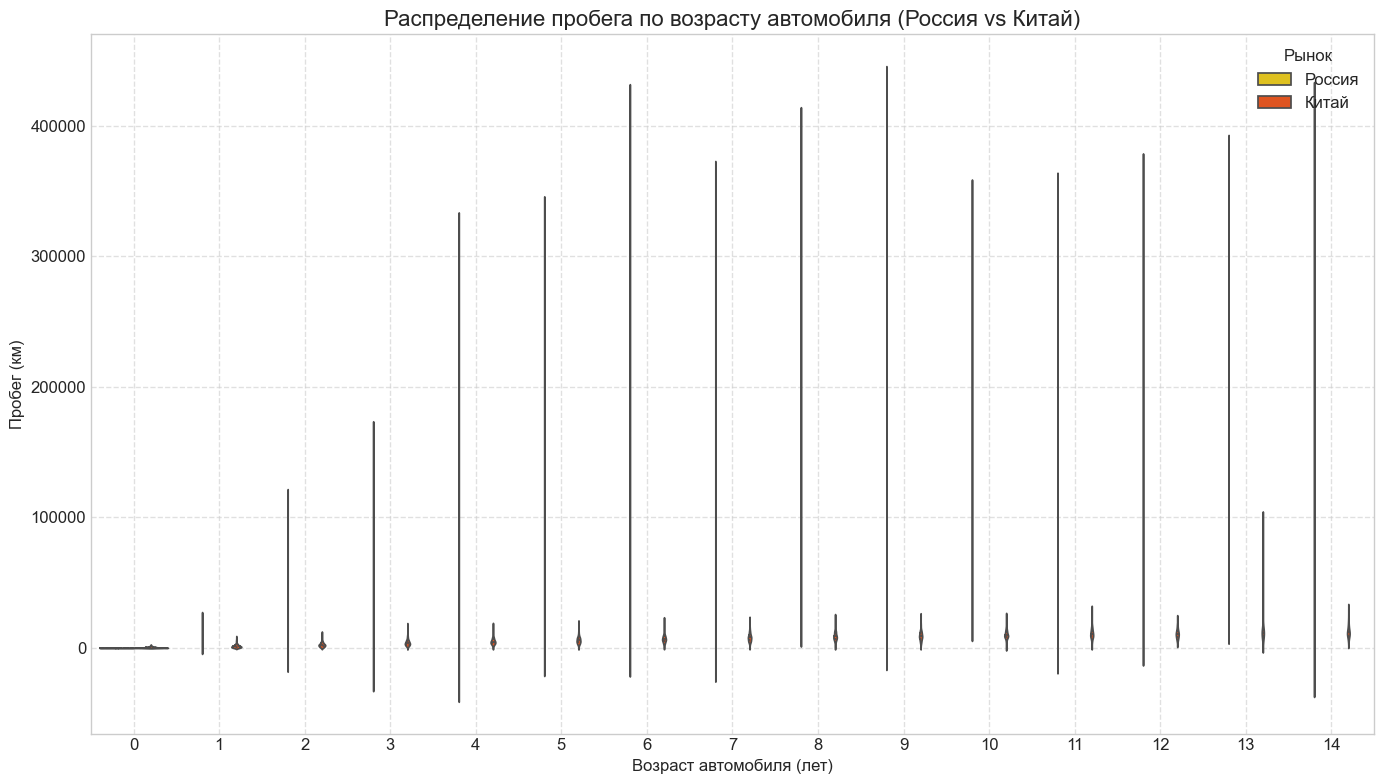

C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:518: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Цвет', y='Количество', hue='Рынок', data=plot_color_data, palette=[pastel_palette[8], pastel_palette[9]])


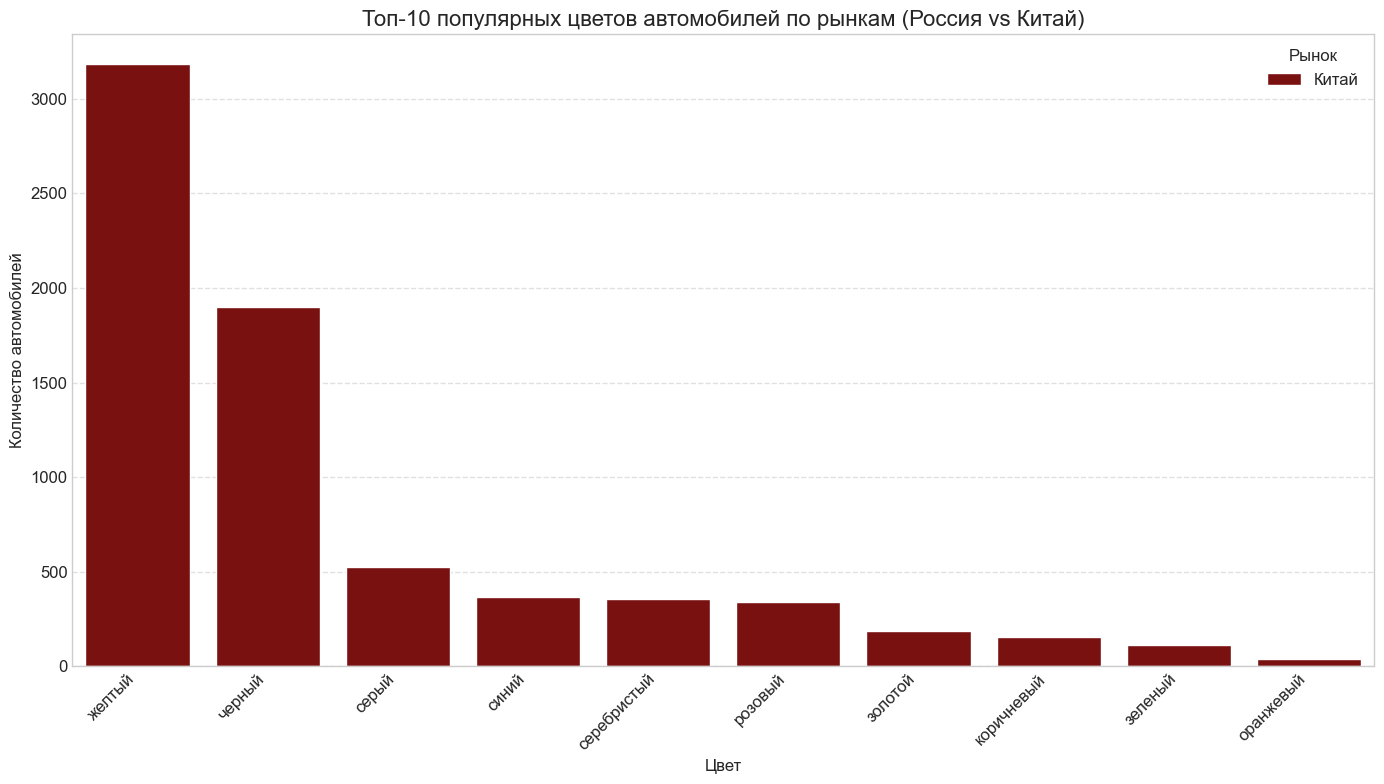

C:\Users\Chulpan\AppData\Local\Temp\ipykernel_20324\2164737185.py:539: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Тип КПП', y='Мощность', hue='Рынок', data=avg_power_by_kpp_market.melt(id_vars='Тип КПП', var_name='Рынок', value_name='Мощность'),


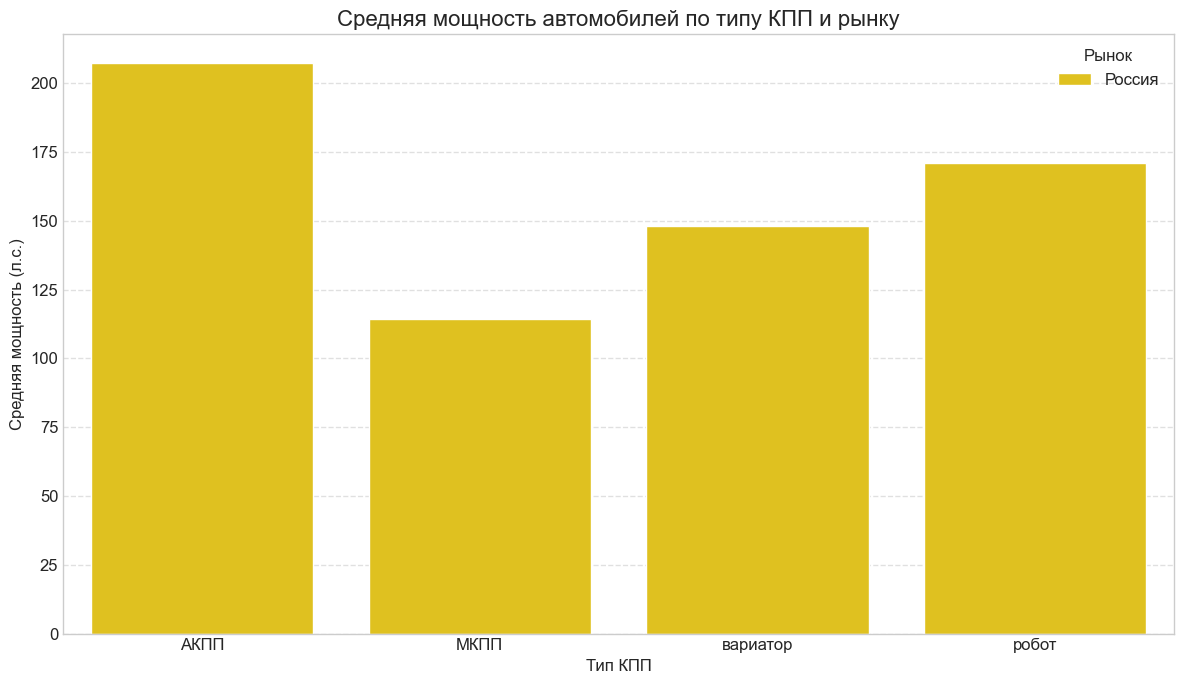

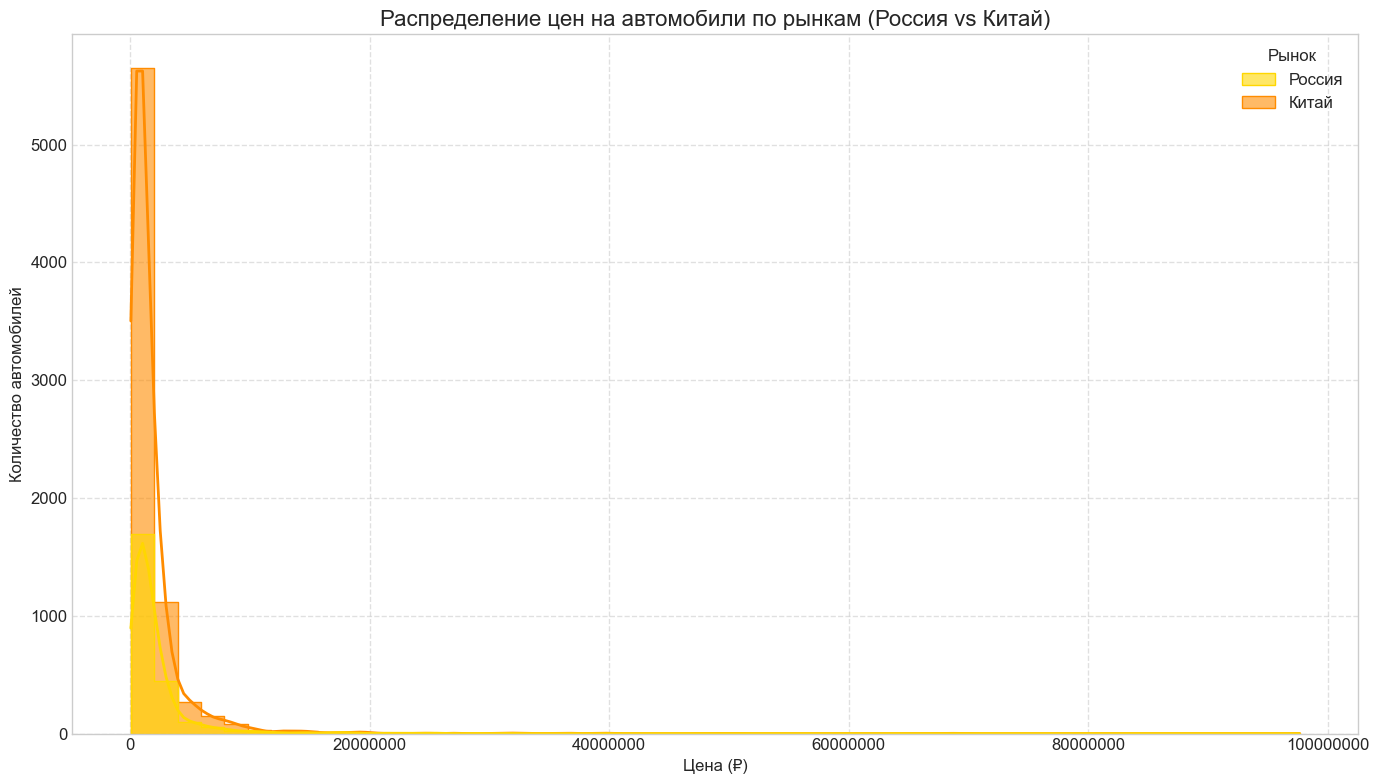

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пользовательская палитра цветов
pastel_palette = [
    '#FFD700',  # Gold (Золотой)
    '#FFEC8B',  # Light Goldenrod (Светлый золотарник)
    '#FFD700',  # Gold (Золотой)
    '#FFA500',  # Orange (Оранжевый)
    '#FF8C00',  # Dark Orange (Темно-оранжевый)
    '#FF4500',  # Orange Red (Оранжево-красный)
    '#FF0000',  # Red (Красный - основной цвет Молнии)
    '#B22222',  # Firebrick (Кирпично-красный)
    '#8B0000',  # Dark Red (Темно-красный)
    '#FF6347'   # Tomato (Томатный)
]

sns.set_palette(pastel_palette)
plt.style.use('seaborn-v0_8-whitegrid')

# Настроим глобальные параметры шрифта и размера фигуры
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

# --- Загрузка и подготовка данных (ИСПРАВЛЕНО И ОБНОВЛЕНО) ---

df_rus = pd.DataFrame()
df_chi = pd.DataFrame()

# Загрузка данных для России
try:
    df_rus = pd.read_csv('russia_cars.csv')
    print("Данные по российскому рынку загружены из 'russia_cars.csv'.")
    df_rus['Рынок'] = 'Россия'

    # Приведение колонки 'Владельцы' к числовому формату
    if 'Владельцы' in df_rus.columns:
        df_rus['Владельцы'] = df_rus['Владельцы'].replace({'1': 1, '2': 2, '3': 3, '4 и более': 4, 'не указано': -1})
        df_rus['Владельцы'] = pd.to_numeric(df_rus['Владельцы'], errors='coerce').fillna(-1).astype(int)
    else:
        df_rus['Владельцы'] = -1 # Если колонки нет
    
    # Приведение 'Год выпуска' к int
    if 'Год выпуска' in df_rus.columns:
        df_rus['Год выпуска'] = pd.to_numeric(df_rus['Год выпуска'], errors='coerce').fillna(0).astype(int)
        df_rus['Возраст'] = 2025 - df_rus['Год выпуска']
    else:
        df_rus['Год выпуска'] = 0
        df_rus['Возраст'] = 0

    # Обработка 'Тип КПП' (для России она уже есть)
    if 'Коробка передач' in df_rus.columns:
        df_rus['Тип КПП'] = df_rus['Коробка передач'].replace({'автомат': 'АКПП', 'механика': 'МКПП'})
    elif 'Тип КПП' not in df_rus.columns:
        df_rus['Тип КПП'] = 'не указано' # Если нет ни одной из колонок

    # Проверка наличия 'Мощность' и 'Привод', 'Тип топлива'
    for col in ['Мощность', 'Привод', 'Тип кузова', 'Цвет', 'Тип топлива']:
        if col not in df_rus.columns:
            df_rus[col] = 'не указано' if col in ['Тип кузова', 'Цвет', 'Привод', 'Тип топлива'] else np.nan # Заполняем по умолчанию
    
except FileNotFoundError:
    print("Файл 'russia_cars.csv' не найден. Убедитесь, что он создан и находится в той же директории.")


# Загрузка данных для Китая
try:
    df_chi = pd.read_csv('china.csv')
    print("Данные по китайским аукционам загружены из 'china.csv'.")
    df_chi.rename(columns={'Цена на аукционе': 'Цена'}, inplace=True) # Переименовываем для унификации
    df_chi['Рынок'] = 'Китай'

    # Приведение 'Год выпуска' к int
    if 'Год выпуска' in df_chi.columns:
        df_chi['Год выпуска'] = pd.to_numeric(df_chi['Год выпуска'], errors='coerce').fillna(0).astype(int)
        df_chi['Возраст'] = 2025 - df_chi['Год выпуска']
    else:
        df_chi['Год выпуска'] = 0
        df_chi['Возраст'] = 0

    # Унификация 'Мощность' для китайских данных
    if 'Мощность' not in df_chi.columns and 'Двигатель' in df_chi.columns:
        df_chi.rename(columns={'Двигатель': 'Мощность'}, inplace=True)
        print("Колонка 'Двигатель' в китайских данных переименована в 'Мощность'.")
    elif 'Мощность' not in df_chi.columns:
        df_chi['Мощность'] = np.nan # Если нет ни того, ни другого

    # Унификация 'Тип КПП' для китайских данных
    if 'Коробка передач_механика' in df_chi.columns: # Создаем колонку Тип КПП на основе OneHotEncoded
        df_chi['Тип КПП'] = 'автомат' # По умолчанию
        df_chi.loc[df_chi['Коробка передач_механика'] == 1, 'Тип КПП'] = 'механика'
    elif 'Коробка передач' in df_chi.columns: # Если есть исходная колонка
        df_chi['Тип КПП'] = df_chi['Коробка передач']
    else:
        df_chi['Тип КПП'] = 'не указано' # Если нет ни одной из колонок
    
    # Проверка наличия 'Цвет'
    if 'Цвет' not in df_chi.columns:
        # Для Китая цвета в OneHotEncoded формате
        # Попробуем восстановить наиболее популярный цвет, или просто поставить 'не указано'
        color_cols = [col for col in df_chi.columns if col.startswith('Цвет_')]
        if color_cols:
            df_chi['Цвет'] = df_chi[color_cols].idxmax(axis=1).str.replace('Цвет_', '')
        else:
            df_chi['Цвет'] = 'не указано'
    
    # Заполняем отсутствующие колонки NaN, чтобы concat работал корректно
    for col in ['Тип кузова', 'Владельцы', 'Привод', 'Тип топлива']: # Этих колонок точно нет в китайских данных
        if col not in df_chi.columns:
            df_chi[col] = np.nan

except FileNotFoundError:
    print("Файл 'china.csv' не найден. Убедитесь, что он создан и находится в той же директории.")


# Проверяем наличие данных перед продолжением
if df_rus.empty and df_chi.empty:
    print("Нет данных для построения графиков. Проверьте пути к файлам и их наличие.")
    exit()

# Унифицированные колонки для ОБЪЕДИНЕНИЯ (только те, что есть в обоих или нужны для сравнения)
# и для которых мы уже сделали базовую унификацию выше
combined_common_cols = [
    'Марка', 'Модель', 'Год выпуска', 'Цена', 'Рынок', 'Пробег', 'Возраст',
    'Цвет', 'Мощность', 'Тип КПП', 'Тип топлива' # Добавляем Тип топлива
]

# Создаем временные DataFrame для объединения, выбирая только те колонки, которые существуют
df_rus_temp_for_concat = df_rus[[col for col in combined_common_cols if col in df_rus.columns]].copy()
df_chi_temp_for_concat = df_chi[[col for col in combined_common_cols if col in df_chi.columns]].copy()

# Добавляем отсутствующие колонки в каждый temp DataFrame с NaN, чтобы concat не ругался
for col in combined_common_cols:
    if col not in df_rus_temp_for_concat.columns:
        df_rus_temp_for_concat[col] = np.nan
    if col not in df_chi_temp_for_concat.columns:
        df_chi_temp_for_concat[col] = np.nan

# Теперь конкатенация должна пройти успешно
df_combined = pd.concat([df_rus_temp_for_concat, df_chi_temp_for_concat], ignore_index=True)
print("Объединенный DataFrame создан.")


# Убедимся, что числовые колонки имеют правильный тип после объединения
for col in ['Цена', 'Пробег', 'Год выпуска', 'Возраст', 'Мощность']:
    if col in df_rus.columns:
        df_rus[col] = pd.to_numeric(df_rus[col], errors='coerce')
    if col in df_chi.columns:
        df_chi[col] = pd.to_numeric(df_chi[col], errors='coerce')
    if col in df_combined.columns:
        df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

# Обработка NaN в ключевых колонках для графиков, чтобы избежать ошибок плоттинга
df_rus.dropna(subset=['Марка', 'Модель', 'Цена', 'Пробег', 'Возраст'], inplace=True)
df_chi.dropna(subset=['Марка', 'Модель', 'Цена', 'Пробег', 'Возраст'], inplace=True)
if not df_combined.empty:
    df_combined.dropna(subset=['Марка', 'Модель', 'Цена', 'Пробег', 'Возраст'], inplace=True)

# Дополнительная обработка для df_combined, если есть специфичные колонки, отсутствующие в одном из DF
# Эти колонки нужны для определенных графиков, но могут отсутствовать в одном из исходных DF
if 'Владельцы' not in df_combined.columns:
    df_combined['Владельцы'] = np.nan
if 'Тип кузова' not in df_combined.columns:
    df_combined['Тип кузова'] = 'не указано' # Или np.nan
if 'Привод' not in df_combined.columns:
    df_combined['Привод'] = 'не указано' # Или np.nan
# Убедимся, что 'Тип топлива' существует в df_combined, если его нет в одном из исходных DF
if 'Тип топлива' not in df_combined.columns:
    df_combined['Тип топлива'] = 'не указано'

print("\nПодготовка данных завершена. Начинаем построение графиков.")

# --- Конец блока загрузки и подготовки данных ---


# --- ГРАФИКИ ДЛЯ РОССИЙСКОГО РЫНКА (df_rus) ---

print("\n--- ГРАФИКИ ДЛЯ РОССИЙСКОГО РЫНКА ---")

#### График 1 (Россия): Топ-10 самых популярных марок и их средняя цена
if not df_rus.empty:
    # plt.style.use('dark_background')

    top_brands = df_rus['Марка'].value_counts().head(10).index
    df_top_brands = df_rus[df_rus['Марка'].isin(top_brands)].groupby('Марка').agg(
        count=('Марка', 'count'),
        avg_price=('Цена', 'mean')
    ).sort_values(by='count', ascending=False).reset_index()

    fig, ax1 = plt.subplots(figsize=(14, 8))

    sns.barplot(x='Марка', y='count', data=df_top_brands, ax=ax1, palette=sns.color_palette(pastel_palette, 10))
    ax1.set_xlabel('Марка', fontsize=12)
    ax1.set_ylabel('Количество объявлений', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.ticklabel_format(style='plain', axis='y')

    # ax2 = ax1.twinx()
    # sns.lineplot(x='Марка', y='avg_price', data=df_top_brands, ax=ax2, color=pastel_palette[7], marker='o', linestyle='--', linewidth=2)
    # ax2.set_ylabel('Средняя цена (₽)', color=pastel_palette[7], fontsize=12)
    # ax2.tick_params(axis='y', labelcolor=pastel_palette[7])
    # ax2.ticklabel_format(style='plain', axis='y')
    

    plt.title('Топ-10 популярных марок автомобилей и их средняя цена (Россия)', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Данных по российскому рынку нет для Графика 1.")

#### График 2 (Россия): Зависимость цены от возраста и пробега с учетом мощности
if not df_rus.empty and 'Возраст' in df_rus.columns and 'Мощность' in df_rus.columns:
    plot_df = df_rus.dropna(subset=['Возраст', 'Пробег', 'Цена', 'Мощность']).copy()
    plot_df['Пробег_КМ'] = plot_df['Пробег'] / 1000

    plt.figure(figsize=(14, 8))
    ax = sns.scatterplot( # Получаем объект Axes
        data=plot_df,
        x='Возраст',
        y='Цена',
        size='Пробег_КМ',
        hue='Мощность',
        palette='viridis_r',
        sizes=(50, 1000),
        alpha=0.6
    )

    norm = plt.Normalize(plot_df['Мощность'].min(), plot_df['Мощность'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
    sm.set_array([])
    # ИСПРАВЛЕНИЕ: Передаем объект осей `ax` в colorbar
    plt.colorbar(sm, label="Мощность (л.с.)", ax=ax) # Явное указание ax

    plt.xlabel('Возраст автомобиля (лет)')
    plt.ylabel('Цена (₽)')
    plt.title('Средняя цена по возрасту, пробегу и мощности (Россия)', fontsize=16)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Данных по российскому рынку или необходимых колонок ('Возраст', 'Пробег', 'Цена', 'Мощность') нет для Графика 2.")

#### График 3 (Россия): Тепловая карта популярности комбинаций "Тип кузова" и "Цвет"
if not df_rus.empty and 'Тип кузова' in df_rus.columns and 'Цвет' in df_rus.columns:
    # Удалим записи с "не указано", если они доминируют и мешают визуализации
    heatmap_data = df_rus[(df_rus['Тип кузова'] != 'не указано') & (df_rus['Цвет'] != 'не указано')].pivot_table(
        index='Тип кузова', columns='Цвет', aggfunc='size', fill_value=0
    )
    
    if not heatmap_data.empty and not heatmap_data.columns.empty and not heatmap_data.index.empty: # Дополнительная проверка на пустоту
        plt.figure(figsize=(16, 10))
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='lightgray')
        plt.title('Распределение автомобилей по типу кузова и цвету (Россия)', fontsize=16)
        plt.xlabel('Цвет', fontsize=12)
        plt.ylabel('Тип кузова', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения тепловой карты (слишком много 'не указано' или пустой результат).")
else:
    print("Данных по российскому рынку или необходимых колонок ('Тип кузова', 'Цвет') нет для Графика 3.")

#### График 4 (Россия): Средняя цена по количеству владельцев
if not df_rus.empty and 'Владельцы' in df_rus.columns:
    # Убедимся, что 'Владельцы' обработано в число
    # Владельцы: 1, 2, 3, 4 и более, не указано (-1)
    
    owner_categories_map = {1: '1 владелец', 2: '2 владельца', 3: '3 владельца', 4: '4 и более', -1: 'не указано'}
    df_rus['Владельцы_Категория'] = df_rus['Владельцы'].map(owner_categories_map).fillna('не указано')
    
    # Упорядочиваем категории для корректного отображения на графике
    sorted_owners_display = ['1 владелец', '2 владельца', '3 владельца', '4 и более', 'не указано']
    df_rus['Владельцы_Категория'] = pd.Categorical(df_rus['Владельцы_Категория'], categories=sorted_owners_display, ordered=True)
        
    avg_price_by_owners = df_rus.groupby('Владельцы_Категория')['Цена'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Владельцы_Категория', y='Цена', data=avg_price_by_owners, palette=sns.color_palette(pastel_palette, len(avg_price_by_owners)))
    plt.xlabel('Количество владельцев', fontsize=12)
    plt.ylabel('Средняя цена (₽)', fontsize=12)
    plt.title('Средняя цена автомобиля по количеству владельцев (Россия)', fontsize=16)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Данных по российскому рынку или колонки 'Владельцы' нет для Графика 4.")

#### График 5 (Россия): Распределение автомобилей по типу КПП и приводу
if not df_rus.empty and 'Тип КПП' in df_rus.columns and 'Привод' in df_rus.columns:
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Диаграмма для Типа КПП
    kpp_counts = df_rus['Тип КПП'].value_counts()
    axes[0].pie(kpp_counts, labels=kpp_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_palette[:len(kpp_counts)])
    axes[0].set_title('Доля автомобилей по типу КПП (Россия)', fontsize=14)
    axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

    # Диаграмма для Привода
    drive_counts = df_rus['Привод'].value_counts()
    axes[1].pie(drive_counts, labels=drive_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_palette[3:3+len(drive_counts)])
    axes[1].set_title('Доля автомобилей по типу привода (Россия)', fontsize=14)
    axes[1].axis('equal')

    plt.tight_layout()
    plt.show()
else:
    print("Данных по российскому рынку или необходимых колонок ('Тип КПП', 'Привод') нет для Графика 5.")

#### **НОВЫЙ ГРАФИК 6 (Россия): Распределение цен по типу топлива**
if not df_rus.empty and 'Тип топлива' in df_rus.columns and 'Цена' in df_rus.columns:
    plot_df = df_rus[df_rus['Тип топлива'] != 'не указано'].dropna(subset=['Цена', 'Тип топлива']).copy()

    if not plot_df.empty:
        plt.figure(figsize=(12, 7))
        sns.boxplot(x='Тип топлива', y='Цена', data=plot_df, palette='viridis')
        plt.title('Распределение цен по типу топлива (Россия)', fontsize=16)
        plt.xlabel('Тип топлива', fontsize=12)
        plt.ylabel('Цена (₽)', fontsize=12)
        plt.ticklabel_format(style='plain', axis='y')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения графика распределения цен по типу топлива.")
else:
    print("Данных по российскому рынку или необходимых колонок ('Тип топлива', 'Цена') нет для Графика 6.")


# --- ГРАФИКИ ДЛЯ КИТАЙСКОГО РЫНКА (df_chi) ---

print("\n--- ГРАФИКИ ДЛЯ КИТАЙСКОГО РЫНКА ---")

#### График 1 (Китай): Топ-10 марок на китайских аукционах и их средняя аукционная цена
if not df_chi.empty:
    top_brands_chi = df_chi['Марка'].value_counts().head(10).index
    df_top_brands_chi = df_chi[df_chi['Марка'].isin(top_brands_chi)].groupby('Марка').agg(
        count=('Марка', 'count'),
        avg_price=('Цена', 'mean')
    ).sort_values(by='count', ascending=False).reset_index()

    fig, ax1 = plt.subplots(figsize=(14, 8))

    sns.barplot(x='Марка', y='count', data=df_top_brands_chi, ax=ax1, palette=sns.color_palette(pastel_palette, 10))
    ax1.set_xlabel('Марка', fontsize=12)
    ax1.set_ylabel('Количество объявлений', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.ticklabel_format(style='plain', axis='y')

    # ax2 = ax1.twinx()
    # sns.lineplot(x='Марка', y='avg_price', data=df_top_brands_chi, ax=ax2, color=pastel_palette[6], marker='o', linestyle=':', linewidth=2)
    # ax2.set_ylabel('Средняя цена на аукционе (₽)', color=pastel_palette[6], fontsize=12)
    # ax2.tick_params(axis='y', labelcolor=pastel_palette[6])
    # ax2.ticklabel_format(style='plain', axis='y')

    plt.title('Топ-10 популярных марок автомобилей и их средняя аукционная цена (Китай)', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Данных по китайскому рынку нет для Графика 1 (Китай).")

#### График 2 (Китай): Зависимость аукционной цены от возраста и пробега с учетом мощности
if not df_chi.empty and 'Возраст' in df_chi.columns and 'Мощность' in df_chi.columns:
    plot_df_chi = df_chi.dropna(subset=['Возраст', 'Пробег', 'Цена', 'Мощность']).copy()
    plot_df_chi['Пробег_КМ'] = plot_df_chi['Пробег'] / 1000

    plt.figure(figsize=(14, 8))
    ax_chi = sns.scatterplot( # Получаем объект Axes
        data=plot_df_chi,
        x='Возраст',
        y='Цена',
        size='Пробег_КМ',
        hue='Мощность',
        palette='magma_r',
        sizes=(50, 1000),
        alpha=0.6
    )

    norm = plt.Normalize(plot_df_chi['Мощность'].min(), plot_df_chi['Мощность'].max())
    sm = plt.cm.ScalarMappable(cmap="magma_r", norm=norm)
    sm.set_array([])
    # ИСПРАВЛЕНИЕ: Передаем объект осей `ax_chi` в colorbar
    plt.colorbar(sm, label="Мощность (л.с.) / Объем двигателя", ax=ax_chi) # Явное указание ax

    plt.xlabel('Возраст автомобиля (лет)')
    plt.ylabel('Цена на аукционе (₽)')
    plt.title('Средняя аукционная цена по возрасту, пробегу и мощности (Китай)', fontsize=16)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Данных по китайскому рынку или необходимых колонок ('Возраст', 'Пробег', 'Цена', 'Мощность') нет для Графика 2 (Китай).")

#### График 3 (Китай): Тепловая карта популярности комбинаций "Тип КПП" и "Цвет"
if not df_chi.empty and 'Тип КПП' in df_chi.columns and 'Цвет' in df_chi.columns:
    # Удалим записи с "не указано", если они доминируют и мешают визуализации
    heatmap_data_chi = df_chi[(df_chi['Тип КПП'] != 'не указано') & (df_chi['Цвет'] != 'не указано')].pivot_table(
        index='Тип КПП', columns='Цвет', aggfunc='size', fill_value=0
    )
    
    if not heatmap_data_chi.empty and not heatmap_data_chi.columns.empty and not heatmap_data_chi.index.empty: # Дополнительная проверка
        plt.figure(figsize=(16, 10))
        sns.heatmap(heatmap_data_chi, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='lightgray')
        plt.title('Распределение автомобилей по типу КПП и цвету (Китай)', fontsize=16)
        plt.xlabel('Цвет', fontsize=12)
        plt.ylabel('Тип КПП', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения тепловой карты (слишком много 'не указано' или пустой результат) для Китая.")
else:
    print("Данных по китайскому рынку или необходимых колонок ('Тип КПП', 'Цвет') нет для Графика 3 (Китай).")


# --- ГРАФИКИ СРАВНЕНИЯ РОССИИ И КИТАЯ (df_combined) ---

print("\n--- ГРАФИКИ СРАВНЕНИЯ РОССИИ И КИТАЯ ---")

#### График 1 (Сравнение): Сравнение средних цен на автомобили по Маркам
if not df_combined.empty:
    plot_df_compare = df_combined.dropna(subset=['Марка', 'Цена', 'Рынок']).copy()

    # Берем топ-марок, которые есть на обоих рынках для сравнения
    # Находим марки, которые присутствуют на обоих рынках
    rus_brands = plot_df_compare[plot_df_compare['Рынок'] == 'Россия']['Марка'].unique()
    chi_brands = plot_df_compare[plot_df_compare['Рынок'] == 'Китай']['Марка'].unique()
    common_brands_for_plot = list(set(rus_brands) & set(chi_brands))

    if not common_brands_for_plot:
        print("Нет общих марок для сравнения цен на обоих рынках.")
    else:
        plot_df_compare_filtered = plot_df_compare[plot_df_compare['Марка'].isin(common_brands_for_plot)]
        
        # Группируем и сортируем по средней цене в России
        avg_price_by_market_brand = plot_df_compare_filtered.groupby(['Марка', 'Рынок'])['Цена'].mean().unstack().reset_index()
        avg_price_by_market_brand.dropna(subset=['Россия', 'Китай'], inplace=True) # Удаляем строки, где нет данных для одного из рынков
        avg_price_by_market_brand = avg_price_by_market_brand.sort_values(by='Россия', ascending=False).head(15) # Берем топ-15 для наглядности

        if not avg_price_by_market_brand.empty:
            plt.figure(figsize=(16, 9))
            bar_width = 0.35
            index = np.arange(len(avg_price_by_market_brand))

            plt.bar(index, avg_price_by_market_brand['Россия'], bar_width, label='Средняя цена (Россия)', color=pastel_palette[0])
            plt.bar(index + bar_width, avg_price_by_market_brand['Китай'], bar_width, label='Средняя цена (Китай)', color=pastel_palette[4])

            plt.xlabel('Марка', fontsize=12)
            plt.ylabel('Средняя цена (₽)', fontsize=12)
            plt.title('Сравнение средних цен на автомобили по Маркам (Россия vs Китай)', fontsize=16)
            plt.xticks(index + bar_width / 2, avg_price_by_market_brand['Марка'], rotation=45, ha='right')
            plt.ticklabel_format(style='plain', axis='y')
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()
        else:
            print("Недостаточно общих марок с данными для сравнения цен.")
else:
    print("Объединенный DataFrame пуст для Графика 1 (Сравнение).")

#### График 2 (Сравнение): Распределение пробега по возрасту автомобиля на разных рынках
if not df_combined.empty and 'Возраст' in df_combined.columns and 'Пробег' in df_combined.columns:
    plot_df_compare = df_combined.dropna(subset=['Возраст', 'Пробег', 'Рынок']).copy()

    # Ограничиваем возраст и пробег для лучшей визуализации и удаления выбросов
    plot_df_compare = plot_df_compare[
        (plot_df_compare['Возраст'] < 15) & # Например, до 15 лет
        (plot_df_compare['Пробег'] < plot_df_compare['Пробег'].quantile(0.99)) # Убираем верхний 1% выбросов по пробегу
    ]

    if not plot_df_compare.empty:
        plt.figure(figsize=(14, 8))
        sns.violinplot(
            x='Возраст',
            y='Пробег',
            hue='Рынок',
            data=plot_df_compare,
            palette=[pastel_palette[2], pastel_palette[5]],
            inner='quartile'
        )
        plt.xlabel('Возраст автомобиля (лет)', fontsize=12)
        plt.ylabel('Пробег (км)', fontsize=12)
        plt.title('Распределение пробега по возрасту автомобиля (Россия vs Китай)', fontsize=16)
        plt.ticklabel_format(style='plain', axis='y')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения виолинового графика после фильтрации.")
else:
    print("Объединенный DataFrame или необходимые колонки отсутствуют для Графика 2 (Сравнение).")

#### **НОВЫЙ ГРАФИК 3 (Сравнение): Популярность цветов по рынкам**
if not df_combined.empty and 'Цвет' in df_combined.columns and 'Рынок' in df_combined.columns:
    # Отфильтруем "не указано"
    plot_df_colors = df_combined[df_combined['Цвет'] != 'не указано'].copy()
    
    if not plot_df_colors.empty:
        color_counts = plot_df_colors.groupby(['Цвет', 'Рынок']).size().unstack(fill_value=0)
        # Выбираем топ N цветов, которые наиболее популярны суммарно
        top_colors = color_counts.sum(axis=1).nlargest(10).index
        plot_color_data = color_counts.loc[top_colors].stack().reset_index(name='Количество')

        plt.figure(figsize=(14, 8))
        sns.barplot(x='Цвет', y='Количество', hue='Рынок', data=plot_color_data, palette=[pastel_palette[8], pastel_palette[9]])
        plt.title('Топ-10 популярных цветов автомобилей по рынкам (Россия vs Китай)', fontsize=16)
        plt.xlabel('Цвет', fontsize=12)
        plt.ylabel('Количество автомобилей', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения графика популярности цветов.")
else:
    print("Объединенный DataFrame или необходимые колонки ('Цвет', 'Рынок') отсутствуют для Графика 3 (Сравнение).")

#### **НОВЫЙ ГРАФИК 4 (Сравнение): Средняя мощность по типу КПП и рынку**
if not df_combined.empty and 'Мощность' in df_combined.columns and 'Тип КПП' in df_combined.columns and 'Рынок' in df_combined.columns:
    plot_df_power_kpp = df_combined[(df_combined['Тип КПП'] != 'не указано') & (df_combined['Мощность'].notna())].copy()
    
    if not plot_df_power_kpp.empty:
        avg_power_by_kpp_market = plot_df_power_kpp.groupby(['Тип КПП', 'Рынок'])['Мощность'].mean().unstack().reset_index()
        
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Тип КПП', y='Мощность', hue='Рынок', data=avg_power_by_kpp_market.melt(id_vars='Тип КПП', var_name='Рынок', value_name='Мощность'), 
                    palette=[pastel_palette[0], pastel_palette[3]])
        plt.title('Средняя мощность автомобилей по типу КПП и рынку', fontsize=16)
        plt.xlabel('Тип КПП', fontsize=12)
        plt.ylabel('Средняя мощность (л.с.)', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения графика средней мощности по типу КПП и рынку.")
else:
    print("Объединенный DataFrame или необходимые колонки ('Мощность', 'Тип КПП', 'Рынок') отсутствуют для Графика 4 (Сравнение).")

#### **НОВЫЙ ГРАФИК 5 (Сравнение): Распределение цены для каждого рынка (Гистограмма + KDE)**
if not df_combined.empty and 'Цена' in df_combined.columns and 'Рынок' in df_combined.columns:
    plot_df_price_dist = df_combined.dropna(subset=['Цена', 'Рынок']).copy()

    if not plot_df_price_dist.empty:
        plt.figure(figsize=(14, 8))
        sns.histplot(data=plot_df_price_dist, x='Цена', hue='Рынок', kde=True, bins=50,
                     palette=[pastel_palette[0], pastel_palette[4]], alpha=0.6,
                     element="step", common_norm=False) # common_norm=False для сравнения распределений
        plt.title('Распределение цен на автомобили по рынкам (Россия vs Китай)', fontsize=16)
        plt.xlabel('Цена (₽)', fontsize=12)
        plt.ylabel('Количество автомобилей', fontsize=12)
        plt.ticklabel_format(style='plain', axis='x')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для построения графика распределения цен.")
else:
    print("Объединенный DataFrame или необходимые колонки ('Цена', 'Рынок') отсутствуют для Графика 5 (Сравнение).")